# Best Match Model

In [1]:
import wikipedia
import nltk
from nltk.corpus import stopwords
import random
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.stem.porter import PorterStemmer
from collections import defaultdict
import math
import seaborn as sns
import matplotlib.pyplot as plt

## Reading 100 documents

In [2]:
article=pd.read_csv('articles.csv')
article

,0
0,"Python is an interpreted, high-level, general-..."
1,The programming language Python was conceived ...
2,The Rafael Python is a family of air-to-air mi...
3,"In computing, a shebang is the character seque..."
4,Setuptools is a package development process li...
...,...
95,Computer vision is an interdisciplinary scient...
96,A computer lab is a space which provides compu...
97,"A laptop (also laptop computer), is a small, p..."
98,A desktop computer is a personal computer desi...


In [3]:
data = article['0']
data[0]

'Python is an interpreted, high-level, general-purpose programming language. Created by Guido van Rossum and first released in 1991, Python\'s design philosophy emphasizes code readability with its notable use of significant whitespace. Its language constructs and object-oriented approach aim to help programmers write clear, logical code for small and large-scale projects.Python is dynamically typed and garbage-collected. It supports multiple programming paradigms, including structured (particularly, procedural), object-oriented, and functional programming. Python is often described as a "batteries included" language due to its comprehensive standard library.Python was conceived in the late 1980s as a successor to the ABC language. Python 2.0, released in 2000, introduced features like list comprehensions and a garbage collection system with reference counting.\nPython 3.0, released in 2008, was a major revision of the language that is not completely backward-compatible, and much Pytho

## cleaning the documents

In [4]:
def clean(data):
    porter=PorterStemmer()
    for i in range(len(data)):
        data[i]=word_tokenize(data[i])
        data[i]=[word.replace('.','') for word in data[i]]
        data[i]=[word.replace('-','') for word in data[i]]
        data[i]=[word for word in data[i] if word.isalpha()]
        data[i]=[word.lower() for word in data[i]]
        data[i]=[word for word in data[i] if not word in stopwords.words("english")]
        data[i]=[porter.stem(word) for word in data[i]]
    return data
    

In [5]:
data=clean(data)
N=len(data)

In [6]:
data[0]

['python',
 'interpret',
 'highlevel',
 'generalpurpos',
 'program',
 'languag',
 'creat',
 'guido',
 'van',
 'rossum',
 'first',
 'releas',
 'python',
 'design',
 'philosophi',
 'emphas',
 'code',
 'readabl',
 'notabl',
 'use',
 'signific',
 'whitespac',
 'languag',
 'construct',
 'objectori',
 'approach',
 'aim',
 'help',
 'programm',
 'write',
 'clear',
 'logic',
 'code',
 'small',
 'largescal',
 'projectspython',
 'dynam',
 'type',
 'garbagecollect',
 'support',
 'multipl',
 'program',
 'paradigm',
 'includ',
 'structur',
 'particularli',
 'procedur',
 'objectori',
 'function',
 'program',
 'python',
 'often',
 'describ',
 'batteri',
 'includ',
 'languag',
 'due',
 'comprehens',
 'standard',
 'librarypython',
 'conceiv',
 'late',
 'successor',
 'abc',
 'languag',
 'python',
 'releas',
 'introduc',
 'featur',
 'like',
 'list',
 'comprehens',
 'garbag',
 'collect',
 'system',
 'refer',
 'count',
 'python',
 'releas',
 'major',
 'revis',
 'languag',
 'complet',
 'backwardcompat',
 'mu

In [7]:
data[0][0]

'python'

In [8]:
for i in range(N):
    data[i]=np.array(data[i])

In [9]:
data[0][0]

'python'

In [10]:
doc_freq=defaultdict(lambda:0)
term_freq_doc=[]
for i in range(N):
    temp=defaultdict(lambda:0)
    for word in data[i]:
        temp[word]+=1
        if(temp[word]==1):
            doc_freq[word]+=1
    term_freq_doc.append(temp)
print('Size of Vocabulary is '+str(len(doc_freq)))      

Size of Vocabulary is 17384


In [11]:
term_freq_doc[0]

defaultdict(<function __main__.<lambda>()>,
            {'python': 196,
             'interpret': 12,
             'highlevel': 2,
             'generalpurpos': 1,
             'program': 43,
             'languag': 64,
             'creat': 4,
             'guido': 4,
             'van': 7,
             'rossum': 7,
             'first': 8,
             'releas': 29,
             'design': 12,
             'philosophi': 7,
             'emphas': 2,
             'code': 27,
             'readabl': 4,
             'notabl': 1,
             'use': 71,
             'signific': 3,
             'whitespac': 2,
             'construct': 2,
             'objectori': 7,
             'approach': 4,
             'aim': 2,
             'help': 2,
             'programm': 7,
             'write': 3,
             'clear': 1,
             'logic': 2,
             'small': 2,
             'largescal': 1,
             'projectspython': 1,
             'dynam': 7,
             'type': 27,
             

In [12]:
term_freq_doc[89]

defaultdict(<function __main__.<lambda>()>,
            {'analog': 116,
             'comput': 158,
             'analogu': 5,
             'type': 8,
             'use': 46,
             'continu': 3,
             'changeabl': 1,
             'aspect': 2,
             'physic': 5,
             'phenomena': 1,
             'electr': 18,
             'mechan': 37,
             'hydraul': 3,
             'quantiti': 3,
             'model': 13,
             'problem': 21,
             'solv': 12,
             'contrast': 1,
             'digit': 19,
             'repres': 5,
             'vari': 6,
             'symbol': 1,
             'discret': 1,
             'valu': 2,
             'time': 16,
             'amplitud': 1,
             'wide': 4,
             'rang': 9,
             'complex': 5,
             'slide': 11,
             'rule': 6,
             'nomogram': 1,
             'simplest': 1,
             'naval': 3,
             'gunfir': 1,
             'control': 22,
      

## cleaning query

In [13]:
def clean_query(query):
    porter=PorterStemmer()
    query=word_tokenize(query)
    query=[word.replace('.','') for word in query]
    query=[word.replace('-','') for word in query]
    query=[word for word in query if word.isalpha()]
    query=[word.lower() for word in query]
    query=[word for word in query if not word in stopwords.words("english")]
    query=[porter.stem(word) for word in query]
    query=np.array(query)
    return query

In [14]:
import math
def rel_val(Q,j):
    summ=0
    for term in Q:
        if(term in data[j]):
            summ = summ + ((100-doc_freq[term]+0.5)/(doc_freq[term]+0.5))
    if summ<=0:
        return 9
    return math.log2(summ)

N=100 <br/>
doc_freq[term] - number of documents in which term occurs

In [15]:
rel_val(clean_query('python is language'),5)

1.9709751879454993

## Term frequency factor $F_{i,j}$

In [16]:
def Fij(term,j,K1):
    val=(1+K1)*(term_freq_doc[j][term]/(K1+term_freq_doc[j][term]))
    return val

term_freq_doc[j][term] - frequency of term in the $doc_{j}$

In [17]:
clean_query('python is language')

array(['python', 'languag'], dtype='<U7')

In [18]:
avg_doclen=0
for i in data:
    for j in i:
        avg_doclen+=1
avg_doclen = avg_doclen/len(data)

In [19]:
avg_doclen

2281.21

## Modify $F_{i,j}$ using document length normalization

In [20]:
def F_ij(term,j,K1):
    val=(1+K1)*(term_freq_doc[j][term]/((K1*len(data[j])/avg_doclen)+term_freq_doc[j][term]))
    return val

## Correction factor $G_{j,q}$

In [21]:
def Gjq(j,q,K2):
    val = K2*len(q)*((avg_doclen-len(data[j]))/(avg_doclen+len(data[j])))
    return val

## an additional factor for taking into account term frequency within queries

In [22]:
def Fiq(term,q,K3):
    fiq=0
    for j in q:
        if term==j:
            fiq+=1
    val = (1+K3)*(fiq/(K3+fiq))
    return val

## Various BM* Formulae

In [23]:
def BM(j,q,K1,K2,K3,BM='BM1'):
    if BM=='BM1':
        return rel_val(q,j)
    elif BM=='BM15':
        temp=0
        for term in q:
            if(term in data[j]):
                temp=temp+(Fij(term,j,K1)*Fiq(term,q,K3)*math.log2((100-doc_freq[term]+0.5)/(doc_freq[term]+0.5)))
        val=Gjq(j,q,K2)+temp
        return val
    elif BM=='BM11':
        temp=0
        for term in q:
            if(term in data[j]):
                temp=temp+(F_ij(term,j,K1)*Fiq(term,q,K3)*math.log2((100-doc_freq[term]+0.5)/(doc_freq[term]+0.5)))
        val=Gjq(j,q,K2)+temp
        return val
        

## Simpler BM1, BM11 and BM15 formulae

In [24]:
def SimplerBM(j,q,K1,BM='BM1'):
    if BM=='BM1':
        return rel_val(q,j)
    elif BM=='BM15':
        temp=0
        for term in q:
            if(term in data[j]):
                temp = temp+(((K1+1)*term_freq_doc[j][term])/(K1+term_freq_doc[j][term])*\
                       math.log2((100-doc_freq[term]+0.5)/(doc_freq[term]+0.5)))
        return temp
    elif BM=='BM11':
        temp=0
        for term in q:
            if(term in data[j]):
                temp = temp+(((K1+1)*term_freq_doc[j][term])/((K1*len(data[j])/avg_doclen)+term_freq_doc[j][term])*\
                       math.log2((100-doc_freq[term]+0.5)/(doc_freq[term]+0.5)))
        return temp
                

## BM25 Ranking Formula

In [25]:
def Bij(term,j,K1,b):
    val=((K1+1)*term_freq_doc[j][term])/((K1*((1-b)+b*(len(data[j])/avg_doclen)))+term_freq_doc[j][term])
    return val
def BM25(j,q,K1,b):
    summ=0
    for term in q:
        if term in data[j]:
            summ=summ+(Bij(term,j,K1,b)*math.log2((100-doc_freq[term]+0.5)/(doc_freq[term]+0.5)))
    return summ
    

## Rank list generation using Original BM1, BM11 and BM15 formula

In [26]:
def simBM(q,K1,K2,K3):
    q=clean_query(q)
    bm1={}
    bm2={}
    bm3={}
    for i in range(100):
        bm1[i]=BM(i,q,K1,K2,K3,'BM1')
        bm2[i]=BM(i,q,K1,K2,K3,'BM11')
        bm3[i]=BM(i,q,K1,K2,K3,'BM15')
    bm1=sorted(bm1.items(),key = lambda kv:(kv[1], kv[0]))
    bm2=sorted(bm2.items(),key = lambda kv:(kv[1], kv[0]))
    bm3=sorted(bm3.items(),key = lambda kv:(kv[1], kv[0]))
    rank1=[]
    rank2=[]
    rank3=[]
    temp1=[]
    temp2=[]
    temp3=[]
    for i in range(25):
        rank1.append('doc'+str(bm1[100-i-1][0])+' => ('+str(round(bm1[100-1-i][1],4))+') ')
        rank2.append('doc'+str(bm2[100-i-1][0])+' => ('+str(round(bm2[100-1-i][1],4))+') ')
        rank3.append('doc'+str(bm3[100-1-i][0])+' => ('+str(round(bm3[100-1-i][1],4))+') ')
        temp1.append(bm1[100-i-1][0])
        temp2.append(bm2[100-i-1][0])
        temp3.append(bm3[100-i-1][0])
    res=pd.DataFrame({'BM1':rank1,'BM11':rank2,'BM15':rank3})
    return (res,temp1,temp2,temp3,q)

## Generating rank list using simpler BM1, BM11 and BM15 formula

In [27]:
def simSimplerBM(q,K1):
    q=clean_query(q)
    bm1={}
    bm2={}
    bm3={}
    for i in range(100):
        bm1[i]=SimplerBM(i,q,K1,'BM1')
        bm2[i]=SimplerBM(i,q,K1,'BM11')
        bm3[i]=SimplerBM(i,q,K1,'BM15')
    bm1=sorted(bm1.items(),key = lambda kv:(kv[1], kv[0]))
    bm2=sorted(bm2.items(),key = lambda kv:(kv[1], kv[0]))
    bm3=sorted(bm3.items(),key = lambda kv:(kv[1], kv[0]))
    rank1=[]
    rank2=[]
    rank3=[]
    temp1=[]
    temp2=[]
    temp3=[]
    for i in range(25):
        rank1.append('doc'+str(bm1[100-i-1][0])+' => ('+str(round(bm1[100-1-i][1],4))+') ')
        rank2.append('doc'+str(bm2[100-i-1][0])+' => ('+str(round(bm2[100-1-i][1],4))+') ')
        rank3.append('doc'+str(bm3[100-1-i][0])+' => ('+str(round(bm3[100-1-i][1],4))+') ')
        temp1.append(bm1[100-i-1][0])
        temp2.append(bm2[100-i-1][0])
        temp3.append(bm3[100-i-1][0])
    res=pd.DataFrame({'BM1':rank1,'BM11':rank2,'BM15':rank3})
    return (res,temp1,temp2,temp3,q)

## Generating Rank list using BM25

In [28]:
def simBM25(q,K1,b):
    q=clean_query(q)
    bm1={}
    for i in range(100):
        bm1[i]=BM25(i,q,K1,b)
    bm1=sorted(bm1.items(),key = lambda kv:(kv[1], kv[0]))
    rank1=[]
    temp1=[]
    for i in range(25):
        rank1.append('doc'+str(bm1[100-i-1][0])+' => ('+str(round(bm1[100-1-i][1],4))+') ')
        temp1.append(bm1[100-i-1][0])
    res=pd.DataFrame({'BM25':rank1})
    return (res,temp1,q)

### Function to plot graphs

In [29]:
def plot_graphs(q,rank1,rank2,rank3):
    bm1=[]
    bm2=[]
    bm3=[]
    bm1_t=[]
    bm2_t=[]
    bm3_t=[]
    for i in range(len(rank1)):
        bm1.append(len(data[rank1[i]]))
        bm2.append(len(data[rank2[i]]))
        bm3.append(len(data[rank3[i]]))
    for term in q:
        t1=[]
        t2=[]
        t3=[]
        for i in range(len(rank1)):
            t1.append(term_freq_doc[rank1[i]][term])
            t2.append(term_freq_doc[rank2[i]][term])
            t3.append(term_freq_doc[rank3[i]][term])
        bm1_t.append(t1)
        bm2_t.append(t2)
        bm3_t.append(t3)
    bm_1={}
    bm_2={}
    bm_3={}
    i=0
    for term in q:
        bm_1[term]=bm1_t[i]
        bm_2[term]=bm2_t[i]
        bm_3[term]=bm3_t[i]
        i+=1
    bm1_1=pd.DataFrame(bm_1)
    bm2_2=pd.DataFrame(bm_2)
    bm3_3=pd.DataFrame(bm_3)
#     print(bm1)
    
    b=pd.DataFrame({'BM1':bm1,'BM11':bm2,'BM15':bm3})
    plt.figure(figsize=(20,10))
    plt.plot(b.index,b['BM1'],label='doc length')
    plt.xlabel('Doc ID')
    plt.ylabel('length')
    plt.title('Doc length of doc produced by BM1')
    plt.legend()
    plt.show()
    plt.figure(figsize=(20,10))
    for term in q:
        plt.plot(bm1_1.index,bm1_1[term],label=term)
    plt.xlabel('Doc ID')
    plt.ylabel('frequency')
    plt.title('term frequency in doc produced by BM1')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(20,10))
    plt.plot(b.index,b['BM11'],label='doc length')
    plt.xlabel('Doc ID')
    plt.ylabel('length')
    plt.title('Doc length of doc produced by BM11')
    plt.legend()
    plt.show()
    plt.figure(figsize=(20,10))
    for term in q:
        plt.plot(bm2_2.index,bm2_2[term],label=term)
    plt.xlabel('Doc ID')
    plt.ylabel('frequency')
    plt.title('term frequency in doc produced by BM11')
    plt.legend()
    plt.savefig('test.png')
    plt.show()
    
    
    plt.figure(figsize=(20,10))
    plt.plot(b.index,b['BM15'],label='doc length')
    plt.xlabel('Doc ID')
    plt.ylabel('length')
    plt.title('Doc length of doc produced by BM15')
    plt.legend()
    plt.show()
    plt.figure(figsize=(20,10))
    for term in q:
        plt.plot(bm3_3.index,bm3_3[term],label=term)
    plt.xlabel('Doc ID')
    plt.ylabel('frequency')
    plt.title('term frequency in doc produced by BM15')
    plt.legend()
    plt.show()
        

## Testing the models

### a. sim($d_j$,q) using original BM1, BM11 and BM15 <br/>K1=1.2, K2=0.02 and K3=100

In [30]:
(res,rank1,rank2,rank3,q) = simBM('python language for programming skills',1.2,0.02,100)
res

,BM1,BM11,BM15
0,doc69 => (9),doc1 => (3.9255),doc65 => (3.6771)
1,doc66 => (9),doc64 => (3.7572),doc64 => (3.4317)
2,doc63 => (9),doc65 => (3.4292),doc1 => (3.1937)
3,doc62 => (9),doc26 => (3.089),doc18 => (2.8771)
4,doc61 => (9),doc35 => (3.0686),doc8 => (2.7155)
5,doc60 => (9),doc8 => (3.0084),doc9 => (2.5546)
6,doc58 => (9),doc6 => (3.0039),doc14 => (2.5317)
7,doc57 => (9),doc18 => (2.9907),doc26 => (2.4014)
8,doc54 => (9),doc14 => (2.9528),doc35 => (2.4004)
9,doc52 => (9),doc83 => (2.6938),doc6 => (2.1921)


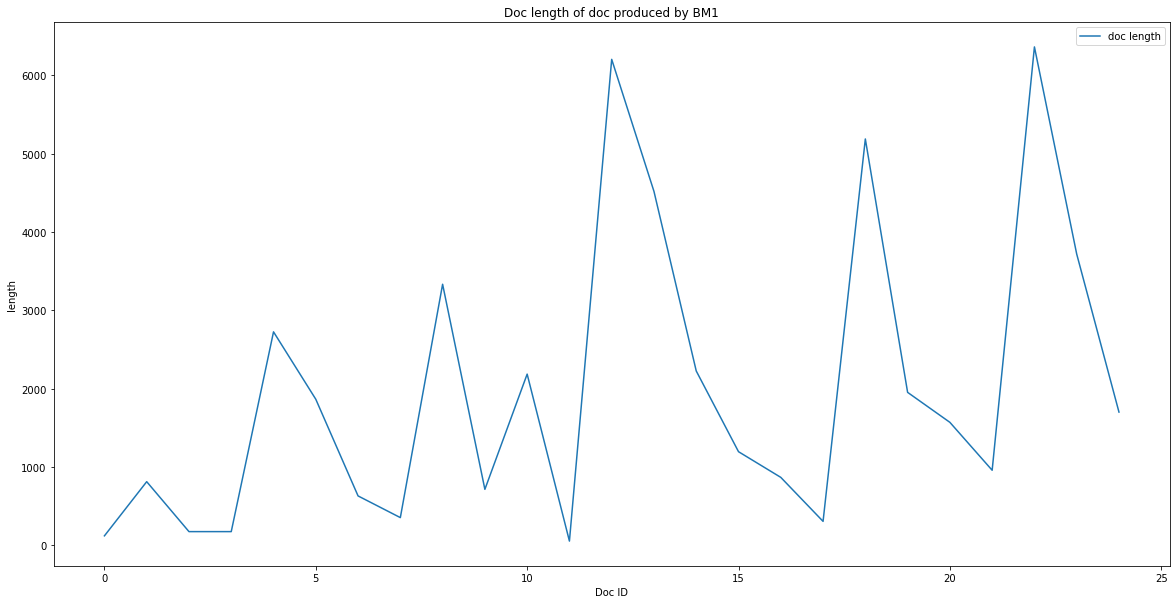

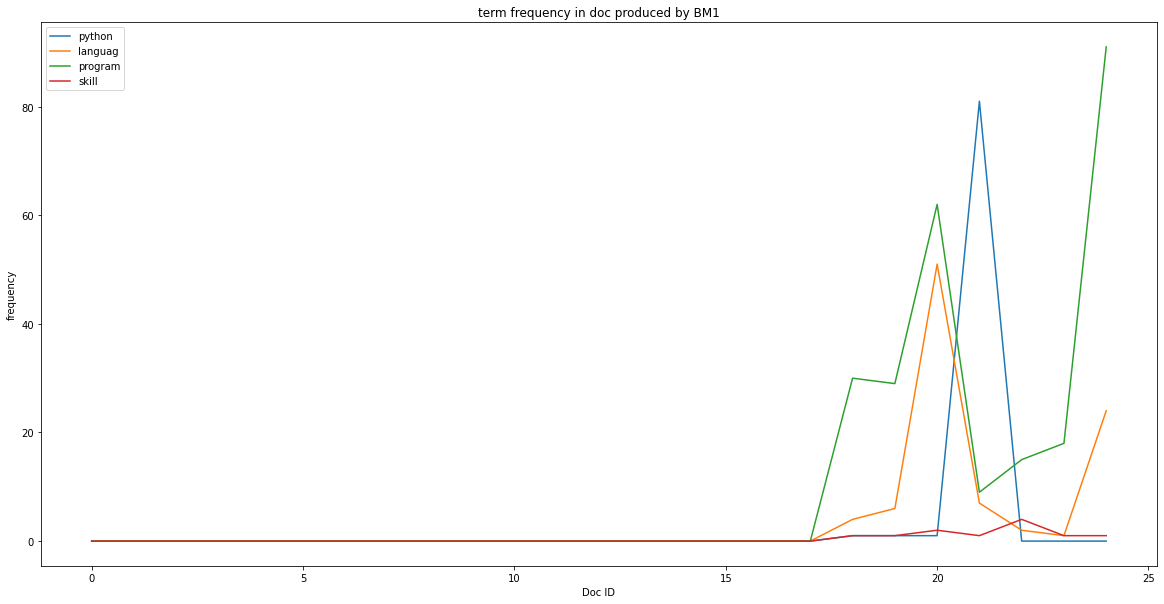

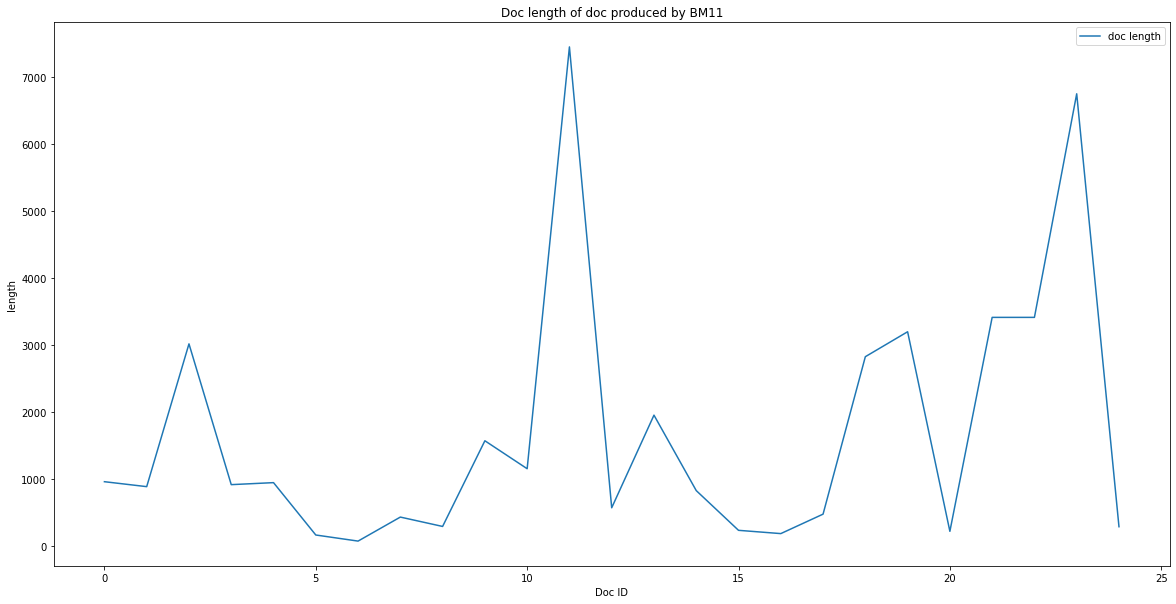

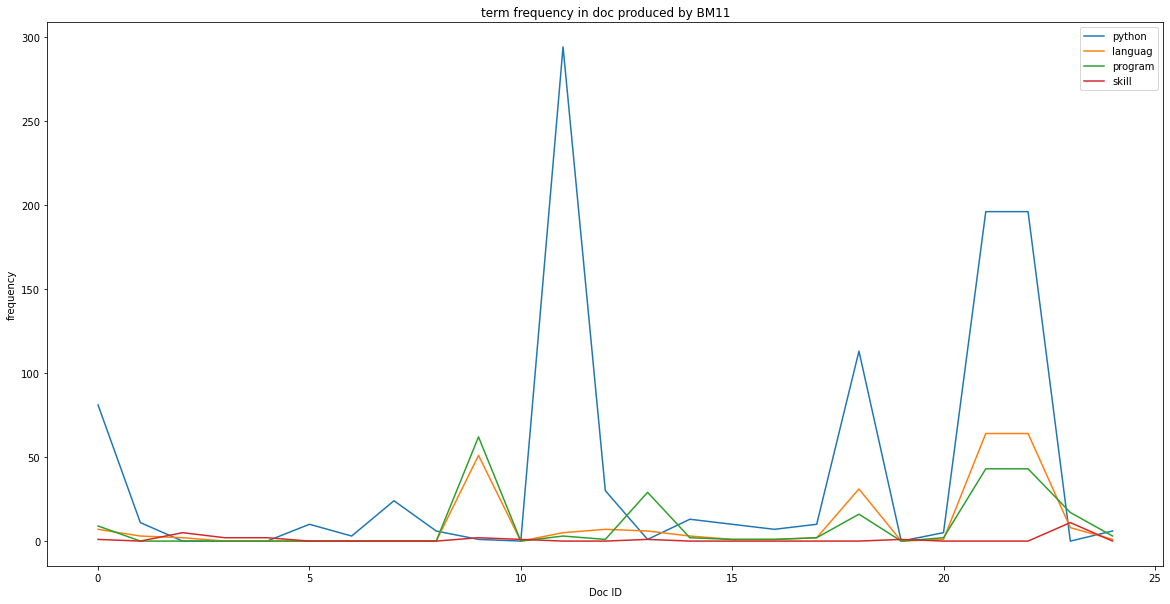

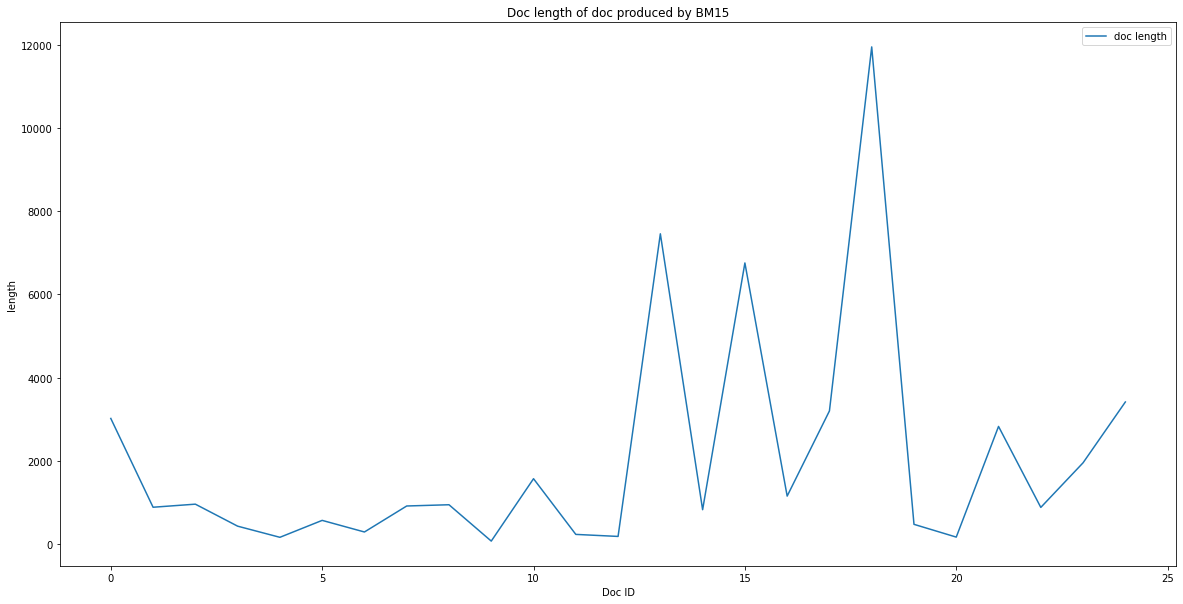

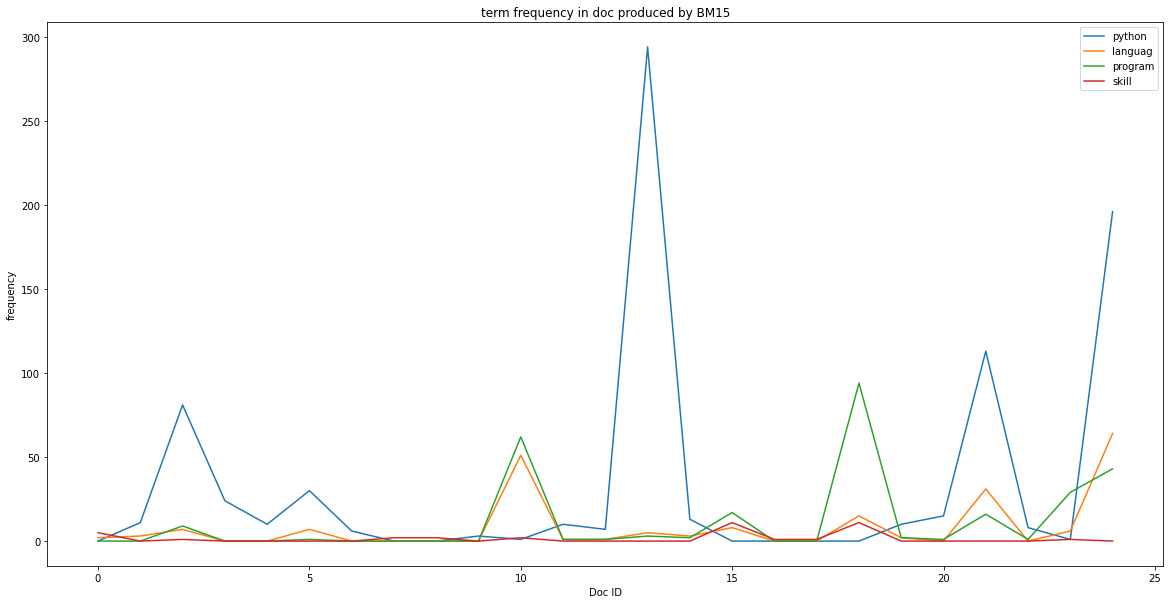

In [31]:
plot_graphs(q,rank1,rank2,rank3)

### b. sim($d_j$,q) using simpler BM1, BM11 and BM15 formula<br/> K1 = 1.2 (standard)

In [32]:
(res,rank1,rank2,rank3,q) = simSimplerBM('python language for programming skills',1.2)
res

,BM1,BM11,BM15
0,doc69 => (9),doc1 => (3.8927),doc65 => (3.6882)
1,doc66 => (9),doc64 => (3.7218),doc64 => (3.3963)
2,doc63 => (9),doc65 => (3.4403),doc1 => (3.1609)
3,doc62 => (9),doc26 => (3.0547),doc18 => (2.8223)
4,doc61 => (9),doc35 => (3.0353),doc8 => (2.6459)
5,doc60 => (9),doc8 => (2.9389),doc9 => (2.5064)
6,doc58 => (9),doc18 => (2.936),doc14 => (2.4695)
7,doc57 => (9),doc6 => (2.9285),doc35 => (2.3671)
8,doc54 => (9),doc14 => (2.8907),doc26 => (2.3671)
9,doc52 => (9),doc83 => (2.679),doc6 => (2.1167)


#### K1=1.9

In [33]:
(res,rank1,rank2,rank3,q) = simSimplerBM('python language for programming skills',1.9)
res

,BM1,BM11,BM15
0,doc69 => (9),doc64 => (4.7357),doc65 => (4.3033)
1,doc66 => (9),doc1 => (4.6274),doc64 => (4.1495)
2,doc63 => (9),doc65 => (3.9151),doc1 => (3.6953)
3,doc62 => (9),doc8 => (3.8553),doc18 => (3.6198)
4,doc61 => (9),doc18 => (3.8493),doc9 => (3.5163)
5,doc60 => (9),doc6 => (3.834),doc8 => (3.2827)
6,doc58 => (9),doc14 => (3.7567),doc14 => (2.9669)
7,doc57 => (9),doc26 => (3.6182),doc10 => (2.7037)
8,doc54 => (9),doc35 => (3.5858),doc35 => (2.5602)
9,doc52 => (9),doc10 => (3.28),doc26 => (2.5602)


#### K1=0.3

In [39]:
(res,rank1,rank2,rank3,q) = simSimplerBM('python language for programming skills',0.3)
res

,BM1,BM11,BM15
0,doc69 => (9),doc1 => (2.7753),doc65 => (2.6324)
1,doc66 => (9),doc65 => (2.5735),doc1 => (2.5201)
2,doc63 => (9),doc83 => (2.5112),doc83 => (2.325)
3,doc62 => (9),doc64 => (2.3098),doc64 => (2.2494)
4,doc61 => (9),doc85 => (2.1916),doc85 => (2.0839)
5,doc60 => (9),doc26 => (2.1114),doc93 => (2.0701)
6,doc58 => (9),doc35 => (2.1075),doc35 => (1.9461)
7,doc57 => (9),doc73 => (1.944),doc26 => (1.9461)
8,doc54 => (9),doc8 => (1.7475),doc18 => (1.7295)
9,doc52 => (9),doc18 => (1.747),doc73 => (1.7215)


### c. sim($d_j$,q) using BM25

#### K1=1.2 and b=0.75

In [35]:
(res,rank1,q) = simBM25('python language for programming skills',1.2,0.75)
res

,BM25
0,doc1 => (3.6485)
1,doc64 => (3.6326)
2,doc65 => (3.4988)
3,doc18 => (2.9067)
4,doc8 => (2.8597)
5,doc26 => (2.8479)
6,doc35 => (2.8352)
7,doc14 => (2.7725)
8,doc6 => (2.6723)
9,doc83 => (2.5155)


#### K1=1.8 and b=0.75

In [36]:
(res,rank1,q) = simBM25('python language for programming skills',1.8,0.75)
res

,BM25
0,doc64 => (4.4403)
1,doc1 => (4.202)
2,doc65 => (3.9405)
3,doc18 => (3.6644)
4,doc8 => (3.577)
5,doc14 => (3.4185)
6,doc6 => (3.2419)
7,doc26 => (3.2246)
8,doc35 => (3.2056)
9,doc10 => (3.0732)


#### K1=1.8 and b=0.5

In [37]:
(res,rank1,q) = simBM25('python language for programming skills',1.8,0.5)
res

,BM25
0,doc64 => (4.2989)
1,doc65 => (4.0303)
2,doc1 => (3.9574)
3,doc18 => (3.6109)
4,doc8 => (3.4404)
5,doc14 => (3.2267)
6,doc9 => (3.1537)
7,doc10 => (2.9688)
8,doc26 => (2.9574)
9,doc35 => (2.9467)


#### K1=1.2 and b=0.5

In [38]:
(res,rank1,q) = simBM25('python language for programming skills',1.2,0.5)
res

,BM25
0,doc65 => (3.5596)
1,doc64 => (3.549)
2,doc1 => (3.4529)
3,doc18 => (2.878)
4,doc8 => (2.7847)
5,doc26 => (2.6673)
6,doc14 => (2.6636)
7,doc35 => (2.6599)
8,doc6 => (2.4573)
9,doc83 => (2.3648)
